## Setup

Requirements:


In [40]:
#Load Packages
import pandas as pd
import numpy as np
import patsy as pt
import plotly.express as px
import nbformat
import plotly as py

In [41]:
#Load Data
data = pd.read_csv("amazon-purchases.csv")
survey_data = pd.read_csv("survey.csv")

# Data Pre-Processing

In [42]:
#Add a prime purchase column to the data

#Create a list with prime days inside it
prime_days = ["2022-07-12", "2022-07-13", "2021-06-21", "2021-06-22", "2020-10-13", "2020-10-14", "2019-07-15", "2019-07-16", "2018-07-17", "2018-07-18",]

prime_purchase = []
for i in data["Order Date"]:
    if i in prime_days:
        prime_purchase.append(1)
    else:
        prime_purchase.append(0)
data["Prime Purchase"] = prime_purchase

In [43]:
#Use prime purchase data to create a prime day customer list
prime_day_customer = []
for i in range(len(data)):
    if data["Prime Purchase"][i] == 1:
        prime_day_customer.append(data["Survey ResponseID"][i])
prime_day_customer = set(prime_day_customer)

prime_customer = []
for i in data["Survey ResponseID"]:
    if i in prime_day_customer:
        prime_customer.append(1)
    else:
        prime_customer.append(0)

data["Prime Customer"] = prime_customer

In [44]:
# Merge the purchase data with customer surveys on 'Survey ResponseID'
merged_data = pd.merge(data, survey_data, on='Survey ResponseID', how='inner')

# Display the first few rows of the merged dataframe
print(merged_data.shape, data.shape, survey_data.shape)

(1850717, 32) (1850717, 10) (5027, 23)


In [45]:
subset_data = merged_data[(merged_data['Q-demos-gender'] == 'Female') & (merged_data['Q-demos-age'] == '35 - 44 years') & (merged_data['Prime Customer'] == 1)]

Data exploration

In [46]:
unique_responses_by_gender = merged_data.groupby('Q-demos-gender')['Survey ResponseID'].nunique()
print(unique_responses_by_gender)

Q-demos-gender
Female               2589
Male                 2311
Other                 116
Prefer not to say      11
Name: Survey ResponseID, dtype: int64


In [47]:
subset_data['Order Date'].max()
record = subset_data[merged_data['Order Date'] == subset_data['Order Date'].max()]
record

C:\Users\nicko\AppData\Local\Temp\ipykernel_18320\4112819008.py:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



,Order Date,Purchase Price Per Unit,Quantity,Shipping Address State,Title,ASIN/ISBN (Product Code),Category,Survey ResponseID,Prime Purchase,Prime Customer,...,Q-substance-use-marijuana,Q-substance-use-alcohol,Q-personal-diabetes,Q-personal-wheelchair,Q-life-changes,Q-sell-YOUR-data,Q-sell-consumer-data,Q-small-biz-use,Q-census-use,Q-research-society
1053948,2023-03-22,0.17,16.0,MS,Photo Prints – Matte – Standard Size (4x6),B071RWC7RC,WALL_ART,R_3HAk4tN4hE1Arcm,0,1,...,No,Yes,No,No,"Became pregnant,Had a child",Yes if I get part of the profit,Yes if consumers get part of the profit,Yes,No,Yes


In [48]:
subset_data.columns

Index(['Order Date', 'Purchase Price Per Unit', 'Quantity',
       'Shipping Address State', 'Title', 'ASIN/ISBN (Product Code)',
       'Category', 'Survey ResponseID', 'Prime Purchase', 'Prime Customer',
       'Q-demos-age', 'Q-demos-hispanic', 'Q-demos-race', 'Q-demos-education',
       'Q-demos-income', 'Q-demos-gender', 'Q-sexual-orientation',
       'Q-demos-state', 'Q-amazon-use-howmany', 'Q-amazon-use-hh-size',
       'Q-amazon-use-how-oft', 'Q-substance-use-cigarettes',
       'Q-substance-use-marijuana', 'Q-substance-use-alcohol',
       'Q-personal-diabetes', 'Q-personal-wheelchair', 'Q-life-changes',
       'Q-sell-YOUR-data', 'Q-sell-consumer-data', 'Q-small-biz-use',
       'Q-census-use', 'Q-research-society'],
      dtype='object')

In [50]:
# Convert 'Order Date' to datetime
subset_data['Order Date'] = pd.to_datetime(subset_data['Order Date'])

# Group by 'Order Date' and sum the 'Purchase Price Per Unit'
transaction_totals = subset_data.groupby(['Order Date', 'Q-demos-gender'])['Purchase Price Per Unit'].sum().reset_index()

# Plot the time series
px.line(transaction_totals, x='Order Date', y='Purchase Price Per Unit', title='Transaction Totals Over Time')

C:\Users\nicko\AppData\Local\Temp\ipykernel_18320\758613859.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
subset_data['Year'] = subset_data['Order Date'].dt.year
subset_data['Month'] = subset_data['Order Date'].dt.month
subset_data['Day'] = subset_data['Order Date'].dt.day
subset_data['Day of Week'] = subset_data['Order Date'].dt.dayofweek

C:\Users\nicko\AppData\Local\Temp\ipykernel_18320\4214720678.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\nicko\AppData\Local\Temp\ipykernel_18320\4214720678.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\nicko\AppData\Local\Temp\ipykernel_18320\4214720678.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

In [102]:
subset_data.head()

,Order Date,Purchase Price Per Unit,Quantity,Shipping Address State,Title,ASIN/ISBN (Product Code),Category,Survey ResponseID,Prime Purchase,Prime Customer,...,Q-life-changes,Q-sell-YOUR-data,Q-sell-consumer-data,Q-small-biz-use,Q-census-use,Q-research-society,Year,Month,Day,Day of Week
2748,2018-01-18,6.99,1.0,KS,NaN,B077D6Z153,NaN,R_0Arj0ePpTnReV1v,0,1,...,"Divorce,Moved place of residence",No,No,No,I don't know,Yes,2018,1,18,3
2749,2018-01-22,28.87,1.0,KS,MidWest Foldable Metal Dog Exercise Pen / Pet ...,B002908DX0,PET_PLAYPEN,R_0Arj0ePpTnReV1v,0,1,...,"Divorce,Moved place of residence",No,No,No,I don't know,Yes,2018,1,22,0
2750,2018-01-26,19.99,1.0,KS,White Noise Sleep Sound Machine for Adults | S...,B01H6WXUX8,NOISE_MACHINE,R_0Arj0ePpTnReV1v,0,1,...,"Divorce,Moved place of residence",No,No,No,I don't know,Yes,2018,1,26,4
2751,2018-02-10,7.95,1.0,KS,"GoTags Stainless Steel Pet ID Tags, Personaliz...",B00BJLS55G,LABEL,R_0Arj0ePpTnReV1v,0,1,...,"Divorce,Moved place of residence",No,No,No,I don't know,Yes,2018,2,10,5
2752,2018-02-23,4.94,1.0,KS,Ateco 3.5-Inch Round Stainless Steel Cutter,B002A8QOUU,COOKIE_CUTTER,R_0Arj0ePpTnReV1v,0,1,...,"Divorce,Moved place of residence",No,No,No,I don't know,Yes,2018,2,23,4


# Clustering for Feature Selection

K-means for purchase quantity and purchase totals

In [103]:
#Group by survey response id and count the number of prime purchases and sum the price per unit
prime_users = subset_data.groupby("Survey ResponseID").agg({"Prime Purchase":"sum", "Purchase Price Per Unit":"sum"})
#Left join prime purchases with survey data
print(prime_users.shape)
# Rename the column
prime_users.rename(columns={'Purchase Price Per Unit': 'Purchase Totals'}, inplace=True)

(431, 2)


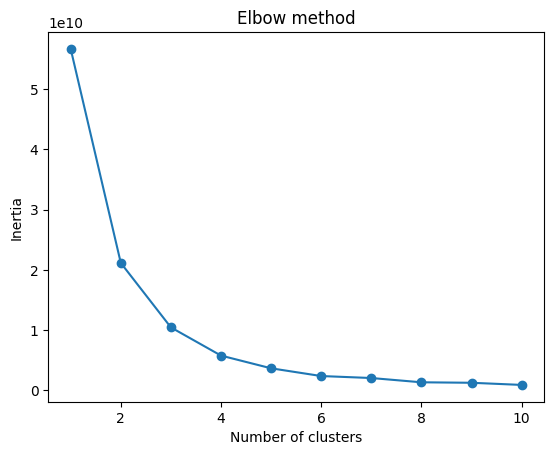

In [104]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

k_data = list(zip(prime_users['Prime Purchase'], prime_users['Purchase Totals']))
inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(k_data)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

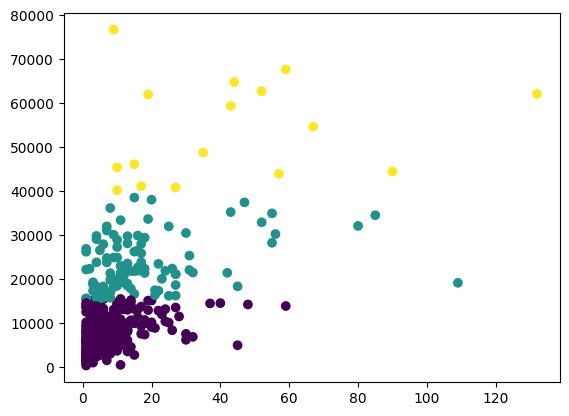

In [107]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(k_data)

plt.scatter(prime_users['Prime Purchase'], prime_users['Purchase Totals'], c=kmeans.labels_)
plt.show()

In [108]:
# Display the cluster centers
print("Cluster Centers:")
print(kmeans.cluster_centers_)

# Display the labels assigned to each data point
print("Cluster Labels:")
print(kmeans.labels_)

prime_users['cluster'] = kmeans.labels_

Cluster Centers:
[[7.26366559e+00 7.82919077e+03]
 [1.76153846e+01 2.33994120e+04]
 [4.28750000e+01 5.38430106e+04]]
Cluster Labels:
[0 1 2 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 0 0 2 0 0 0 1 0 1 0 0 2 2 0
 0 1 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 0 0 1
 1 1 0 0 0 0 0 0 0 0 0 2 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 1
 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0
 1 0 0 0 0 0 1 0 0 0 1 0 0 0 1 1 1 0 2 0 1 2 0 0 0 0 1 0 1 0 0 0 0 2 0 0 1
 2 0 1 0 0 2 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0
 1 0 0 0 0 0 1 0 0 1 0 1 0 1 0 1 0 0 0 1 2 0 0 0 1 0 0 2 0 1 0 0 1 1 1 0 1
 1 0 1 1 1 0 1 0 0 0 0 0 0 0 1 1 0 1 0 1 1 1 0 0 0 0 0 2 1 0 1 1 0 0 2 0 0
 0 0 0 0 0 0 1 0 1 0 0 1 0 2 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 0 1 0 1 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0
 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0

In [109]:
# Merge the subset_data with prime_users to map the cluster labels
subset_data_with_clusters = pd.merge(subset_data, prime_users[['cluster']], on='Survey ResponseID', how='left')

# Display the first few rows of the resulting dataframe
subset_data_with_clusters.head()

,Order Date,Purchase Price Per Unit,Quantity,Shipping Address State,Title,ASIN/ISBN (Product Code),Category,Survey ResponseID,Prime Purchase,Prime Customer,...,Q-sell-YOUR-data,Q-sell-consumer-data,Q-small-biz-use,Q-census-use,Q-research-society,Year,Month,Day,Day of Week,cluster
0,2018-01-18,6.99,1.0,KS,NaN,B077D6Z153,NaN,R_0Arj0ePpTnReV1v,0,1,...,No,No,No,I don't know,Yes,2018,1,18,3,0
1,2018-01-22,28.87,1.0,KS,MidWest Foldable Metal Dog Exercise Pen / Pet ...,B002908DX0,PET_PLAYPEN,R_0Arj0ePpTnReV1v,0,1,...,No,No,No,I don't know,Yes,2018,1,22,0,0
2,2018-01-26,19.99,1.0,KS,White Noise Sleep Sound Machine for Adults | S...,B01H6WXUX8,NOISE_MACHINE,R_0Arj0ePpTnReV1v,0,1,...,No,No,No,I don't know,Yes,2018,1,26,4,0
3,2018-02-10,7.95,1.0,KS,"GoTags Stainless Steel Pet ID Tags, Personaliz...",B00BJLS55G,LABEL,R_0Arj0ePpTnReV1v,0,1,...,No,No,No,I don't know,Yes,2018,2,10,5,0
4,2018-02-23,4.94,1.0,KS,Ateco 3.5-Inch Round Stainless Steel Cutter,B002A8QOUU,COOKIE_CUTTER,R_0Arj0ePpTnReV1v,0,1,...,No,No,No,I don't know,Yes,2018,2,23,4,0


In [ ]:
# Group by cluster and category, then sum the purchase totals
cluster_category_totals = subset_data_with_clusters.groupby(['cluster', 'Category'])['Purchase Price Per Unit'].sum().reset_index()

# Sort the totals within each cluster and select the top 5 categories
top_categories_per_cluster = cluster_category_totals.sort_values(['cluster', 'Purchase Price Per Unit'], ascending=[True, False]).groupby('cluster').head(10)

# Display the result
top_categories_per_cluster

,cluster,Category,Purchase Price Per Unit
4,0,ABIS_BOOK,82644.96
648,0,GIFT_CARD,52568.96
1032,0,PET_FOOD,47012.54
1234,0,SHOES,36172.79
973,0,NUTRITIONAL_SUPPLEMENT,33842.62
1231,0,SHIRT,29856.99
972,0,NOTEBOOK_COMPUTER,24283.90
1004,0,PANTS,24139.74
726,0,HEADPHONES,23385.21
1438,0,TOYS_AND_GAMES,19410.48


In [112]:
subset_data_with_clusters.shape

(287930, 37)

In [77]:
subset_data_with_clusters.to_csv('subset_data_with_clusters.csv', index=False)

In [176]:
# Group by cluster and Date and aggregate the quantity and purchase prices
aggregated_data = subset_data.groupby(['Order Date']).agg({
    'Quantity': 'sum',
    'Purchase Price Per Unit': 'sum'
}).reset_index()

#Add a column for the year, month, day, and day of the week
aggregated_data['Year'] = aggregated_data['Order Date'].dt.year
aggregated_data['Month'] = aggregated_data['Order Date'].dt.month
aggregated_data['Day'] = aggregated_data['Order Date'].dt.day
aggregated_data['Day of Week'] = aggregated_data['Order Date'].dt.dayofweek

# Display the first few rows of the aggregated data
aggregated_data.head()

,Order Date,Quantity,Purchase Price Per Unit,Year,Month,Day,Day of Week
0,2018-01-01,139.0,2047.07,2018,1,1,0
1,2018-01-02,122.0,2123.32,2018,1,2,1
2,2018-01-03,96.0,1532.08,2018,1,3,2
3,2018-01-04,137.0,2704.24,2018,1,4,3
4,2018-01-05,98.0,1923.39,2018,1,5,4


Clustering for dimension reduction

# Specify and Prepare the Model Type

In [180]:
#Exponential Smoothing
from statsmodels.tsa.api import ExponentialSmoothing
from statsmodels.tsa.api import SimpleExpSmoothing
import plotly_express as px

px.line(aggregated_data, x='Order Date', y='Purchase Price Per Unit')

In [181]:
revenue = aggregated_data['Purchase Price Per Unit']
revenue.index = aggregated_data['Order Date']
revenue.index.freq = revenue.index.inferred_freq

alpha020 = SimpleExpSmoothing(revenue).fit(
                                        smoothing_level=0.2,
                                        optimized=False)

alpha050 = SimpleExpSmoothing(revenue).fit(
                                        smoothing_level=0.5,
                                        optimized=False)

alpha080 = SimpleExpSmoothing(revenue).fit(
                                        smoothing_level=0.8,
                                        optimized=False)

forecast020 = alpha020.forecast(3)
forecast050 = alpha050.forecast(3)
forecast080 = alpha080.forecast(3)

In [183]:
import plotly.graph_objects as go

# Plotting our data

smoothData = pd.DataFrame([revenue.values, alpha020.fittedvalues.values,  alpha050.fittedvalues.values,  alpha080.fittedvalues.values]).T
smoothData.columns = ['Truth', 'alpha=0.2', 'alpha=0.5', 'alpha=0.8']
smoothData.index = revenue.index

fig = px.line(smoothData, y = ['Truth', 'alpha=0.2', 'alpha=0.5', 'alpha=0.8'],
        x = smoothData.index,
        color_discrete_map={"Truth": 'blue',
                           'alpha=0.2': 'red',
                            'alpha=0.5':'green',
                            'alpha=0.8':'purple'}
       )

# Incorporating the Forecasts

fig.add_trace(go.Scatter(x=forecast020.index, y = forecast020.values, name='Forecast alpha=0.2', line={'color':'red'}))
fig.add_trace(go.Scatter(x=forecast050.index, y = forecast050.values, name='Forecast alpha=0.5', line={'color':'green'}))
fig.add_trace(go.Scatter(x=forecast080.index, y = forecast080.values, name='Forecast alpha=0.8', line={'color':'purple'}))

In [134]:
#GAMs
from pygam import LinearGAM, s, f
import statsmodels.api as sm
import statsmodels.tsa.stattools as st
import plotly.express as px

In [135]:
aggregated_data.rename(columns={'Day of Week': 'Weekday', 'Purchase Price Per Unit': 'Revenue'}, inplace=True)
aggregated_data.columns

Index(['cluster', 'Date', 'Quantity', 'Revenue', 'Year', 'Month', 'Day',
       'Weekday'],
      dtype='object')

In [143]:
aggregated_data.head()

,cluster,Date,Quantity,Revenue,Year,Month,Day,Weekday
0,0,2018-01-01,73.0,1093.60,2018,1,1,0
1,0,2018-01-02,43.0,684.46,2018,1,2,1
2,0,2018-01-03,32.0,415.92,2018,1,3,2
3,0,2018-01-04,35.0,1073.65,2018,1,4,3
4,0,2018-01-05,38.0,782.82,2018,1,5,4


In [156]:
x = aggregated_data[["Year", "Month", "Day"]]
y = aggregated_data["Revenue"]

In [158]:
x.values

array([[2018,    1,    1],
       [2018,    1,    2],
       [2018,    1,    3],
       ...,
       [2023,    3,   18],
       [2023,    3,   19],
       [2023,    3,   20]])

In [159]:
# Initialize and fit the model
gam = LinearGAM(s(0) + s(1) + s(2))
gamFit = gam.gridsearch(x.values, y)

  0% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--


AttributeError: 'csr_matrix' object has no attribute 'A'

In [ ]:
#Decision Tree

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# As usual, Patsy makes data prep easier
y = data['Prime Customer']
x = data[['Purchase Price Per Unit','Quantity']]

x, xt, y, yt = train_test_split(x, y, 
		test_size=0.33, random_state=42)

In [ ]:
#Random Forest

In [ ]:
#XGBoost

In [ ]:
##NN

In [ ]:
#Bayesian

# Train Models

In [ ]:
#Decision Tree

# Create the model and fit it
clf = DecisionTreeClassifier(max_depth=5)
clf.fit(x, y)

DecisionTreeClassifier(max_depth=5)

# Prediction & Validation

In [ ]:
#Decision Tree "clf"

print("\n\nIn-sample accuracy: %s%%\n\n" 
 % str(round(100*accuracy_score(y, clf.predict(x)), 2)))
print("\n\nOut-of-sample accuracy: %s%%\n\n"
%str(round(100*accuracy_score(yt, clf.predict(xt)), 2)))



In-sample accuracy: 86.96%




Out-of-sample accuracy: 87.02%


